<a href="https://colab.research.google.com/github/VIJAYARAGUL362/TinyVGG-Computer-Vision-Model/blob/main/03_pytorch_computer_vision_exercises.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 03. PyTorch Computer Vision Exercises

The following is a collection of exercises based on computer vision fundamentals in PyTorch.

They're a bunch of fun.

You're going to get to write plenty of code!

## Resources

1. These exercises are based on [notebook 03 of the Learn PyTorch for Deep Learning course](https://www.learnpytorch.io/03_pytorch_computer_vision/).
2. See a live [walkthrough of the solutions (errors and all) on YouTube](https://youtu.be/_PibmqpEyhA).
  * **Note:** Going through these exercises took me just over 3 hours of solid coding, so you should expect around the same.
3. See [other solutions on the course GitHub](https://github.com/mrdbourke/pytorch-deep-learning/tree/main/extras/solutions).

In [54]:
# Check for GPU
!nvidia-smi

Tue Nov 25 13:10:10 2025       
+-----------------------------------------------------------------------------------------+
| NVIDIA-SMI 550.54.15              Driver Version: 550.54.15      CUDA Version: 12.4     |
|-----------------------------------------+------------------------+----------------------+
| GPU  Name                 Persistence-M | Bus-Id          Disp.A | Volatile Uncorr. ECC |
| Fan  Temp   Perf          Pwr:Usage/Cap |           Memory-Usage | GPU-Util  Compute M. |
|                                         |                        |               MIG M. |
|=========================================+========================+======================|
|   0  Tesla T4                       Off |   00000000:00:04.0 Off |                    0 |
| N/A   56C    P0             29W /   70W |     186MiB /  15360MiB |      0%      Default |
|                                         |                        |                  N/A |
+-----------------------------------------+-----

In [55]:
# Import torch
import torch

# Exercises require PyTorch > 1.10.0
print(torch.__version__)

# TODO: Setup device agnostic code
device = "cuda" if torch.cuda.is_available() else "cpu"
device

2.9.0+cu126


'cuda'

## 1. What are 3 areas in industry where computer vision is currently being used?

1. manufacturing
2. self driving car
3. face recongnition

## 2. Search "what is overfitting in machine learning" and write down a sentence about what you find.

That is when the model learns more about the training dataset and memorizes it instead of generalizing it making it do
perform worst on the test dataset

## 3. Search "ways to prevent overfitting in machine learning", write down 3 of the things you find and a sentence about each.
> **Note:** there are lots of these, so don't worry too much about all of them, just pick 3 and start with those.

1. Increasing the no of samples
2. using a dropout layers
3. reducing the no of epochs

## 4. Spend 20-minutes reading and clicking through the [CNN Explainer website](https://poloclub.github.io/cnn-explainer/).

* Upload your own example image using the "upload" button on the website and see what happens in each layer of a CNN as your image passes through it.

## 5. Load the [`torchvision.datasets.MNIST()`](https://pytorch.org/vision/stable/generated/torchvision.datasets.MNIST.html#torchvision.datasets.MNIST) train and test datasets.

In [56]:
from torchvision.transforms import ToTensor
from torchvision import datasets

training_dataset = datasets.FashionMNIST(
    "data",
    train = True,
    transform = ToTensor(),
    target_transform = None,
    download = True
)

test_dataset = datasets.FashionMNIST(
    "data",
    train = False,
    transform = ToTensor(),
    target_transform = None,
    download = True
)

## 6. Visualize at least 5 different samples of the MNIST training dataset.

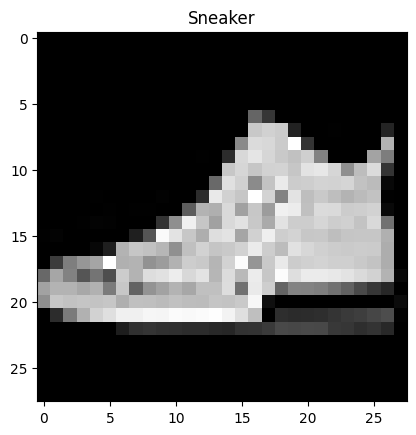

In [57]:
import random
import matplotlib.pyplot as plt
rand_num = random.randint(1,len(training_dataset))
image = training_dataset.data[rand_num]
label = training_dataset.targets[rand_num].item()
classes_name = training_dataset.classes
plt.title(classes_name[label])
plt.imshow(image,cmap ="gray")
plt.show()

## 7. Turn the MNIST train and test datasets into dataloaders using `torch.utils.data.DataLoader`, set the `batch_size=32`.

In [58]:
import torch
from torch.utils.data import DataLoader
train_dataloader = DataLoader(
    training_dataset,
    batch_size = 32,
    shuffle = True,
    )
test_dataloader = DataLoader(
    test_dataset,
    batch_size = 32,
    shuffle = False
)

## 8. Recreate `model_2` used in notebook 03 (the same model from the [CNN Explainer website](https://poloclub.github.io/cnn-explainer/), also known as TinyVGG) capable of fitting on the MNIST dataset.

In [59]:
from torch import nn

In [60]:
class TinyVGG(nn.Module):
    """
    Creates a tinyVGG model
    params:
    input_units (int)
    hidden_units (int)
    output_path (int)
    """
    def __init__(self,input_units,hidden_units,output_units):
        super().__init__()

        self.conv_block_1 = nn.Sequential(
            nn.Conv2d(in_channels = 1,
                      out_channels = hidden_units,
                      kernel_size = 3,
                      stride = 1,
                      padding = 1),
            nn.ReLU(),
            nn.Conv2d(in_channels = hidden_units,
                      out_channels = hidden_units,
                      kernel_size = 3,
                      stride = 1,
                      padding = 1),
            nn.ReLU(),
            nn.MaxPool2d(
                kernel_size = 2
            )
        )

        self.conv_block_2 = nn.Sequential(
            nn.Conv2d(in_channels = hidden_units,
                      out_channels= hidden_units,
                      kernel_size = 3,
                      stride = 1,
                      padding = 1),
            nn.ReLU(),
            nn.Conv2d(in_channels=hidden_units,
                      out_channels = hidden_units,
                      kernel_size = 3,
                      stride = 1,
                      padding = 1),
            nn.ReLU(),
            nn.MaxPool2d(kernel_size = 2)
        )

        self.conv_block_3 = nn.Sequential(
            nn.Flatten(),
            nn.Linear(in_features = 490,out_features=output_units),
        )

    def forward(self,X:torch.Tensor):
        x = self.conv_block_1(X)
        # print(x.shape)
        x = self.conv_block_2(x)
        # print(x.shape)
        x = self.conv_block_3(x)

        return x

In [61]:
model_1  = TinyVGG(input_units = 1,
                   hidden_units = 10,
                   output_units = len(classes_name))

In [62]:
model_1.to(device)

TinyVGG(
  (conv_block_1): Sequential(
    (0): Conv2d(1, 10, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): ReLU()
    (2): Conv2d(10, 10, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (3): ReLU()
    (4): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (conv_block_2): Sequential(
    (0): Conv2d(10, 10, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): ReLU()
    (2): Conv2d(10, 10, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (3): ReLU()
    (4): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (conv_block_3): Sequential(
    (0): Flatten(start_dim=1, end_dim=-1)
    (1): Linear(in_features=490, out_features=10, bias=True)
  )
)

## 9. Train the model you built in exercise 8. for 5 epochs on CPU and GPU and see how long it takes on each.

In [63]:
# Passing the random data to the model
random_data = torch.rand(size=(1,1,28,28))
print(random_data.shape)

model_1(random_data.to(device))

torch.Size([1, 1, 28, 28])


tensor([[-0.0582, -0.0426, -0.0067, -0.0805, -0.0225, -0.0215,  0.0295,  0.0298,
          0.0180,  0.0401]], device='cuda:0', grad_fn=<AddmmBackward0>)

In [64]:
# LODSS FUNCTION AND OPTIMIZER
loss_fn = nn.CrossEntropyLoss()
optimizer = torch.optim.SGD(params=model_1.parameters(),lr=0.1)

In [65]:
# TRAINING THE MODEL
from timeit import default_timer as timer
from tqdm.auto import tqdm
from sklearn.metrics import accuracy_score
epochs = 5

start_time_on_cpu = timer()

for epoch in tqdm(range(epochs)):
    training_accuracy = 0
    training_loss = 0

    testing_accuracy = 0
    testing_loss = 0

    # model on training mode
    model_1.train()

    for batches,(X_train,y_train) in enumerate(train_dataloader):

        X_train,y_train = X_train.to(device),y_train.to(device)
        # FORWARD PROPAGATION
        y_pred_train = model_1(X_train)

        # LOSS CALCULATION
        train_loss = loss_fn(y_pred_train,y_train)
        training_loss += train_loss

        # ACCURACY CALCULATION
        train_accu = accuracy_score(y_train.cpu(),y_pred_train.argmax(dim=1).cpu())
        training_accuracy += train_accu

        # OPTIMIZER STEP
        optimizer.zero_grad()

        # BACKPROPAGATION
        train_loss.backward()

        # GRADIENT DESCENT
        optimizer.step()

        if batches%400 == 0:
            print(f"Trained on {batches*len(X_train)}/{len(train_dataloader.dataset)}")

    training_accuracy /= len(train_dataloader)
    training_loss /= len(train_dataloader)


    model_1.eval()
    with torch.inference_mode():
        for X_test,y_test in test_dataloader:
            X_test,y_test = X_test.to(device),y_test.to(device)
            y_pred_test = model_1(X_test)
            test_loss = loss_fn(y_pred_test,y_test)
            testing_loss += test_loss
            test_accu = accuracy_score(y_test.cpu(),y_pred_test.argmax(dim=1).cpu())
            testing_accuracy += test_accu



        testing_loss /= len(test_dataloader)
        testing_accuracy /= len(test_dataloader)

    print(f"Train acc: {training_accuracy:.2f}, Train loss: {training_loss:.2f}|\
            Test acc : {testing_accuracy:.2f}, Test loss: {testing_loss:.2f}")

end_time_on_cpu =timer()

total_time_on_cpu = end_time_on_cpu - start_time_on_cpu

  0%|          | 0/5 [00:00<?, ?it/s]

Trained on 0/60000
Trained on 12800/60000
Trained on 25600/60000
Trained on 38400/60000
Trained on 51200/60000
Train acc: 0.75, Train loss: 0.69|            Test acc : 0.84, Test loss: 0.49
Trained on 0/60000
Trained on 12800/60000
Trained on 25600/60000
Trained on 38400/60000
Trained on 51200/60000
Train acc: 0.86, Train loss: 0.40|            Test acc : 0.87, Test loss: 0.38
Trained on 0/60000
Trained on 12800/60000
Trained on 25600/60000
Trained on 38400/60000
Trained on 51200/60000
Train acc: 0.87, Train loss: 0.37|            Test acc : 0.87, Test loss: 0.37
Trained on 0/60000
Trained on 12800/60000
Trained on 25600/60000
Trained on 38400/60000
Trained on 51200/60000
Train acc: 0.88, Train loss: 0.34|            Test acc : 0.87, Test loss: 0.36
Trained on 0/60000
Trained on 12800/60000
Trained on 25600/60000
Trained on 38400/60000
Trained on 51200/60000
Train acc: 0.88, Train loss: 0.33|            Test acc : 0.88, Test loss: 0.34


In [66]:
print(f"{total_time_on_cpu:.2f} seconds")

97.40 seconds


## 10. Make predictions using your trained model and visualize at least 5 of them comparing the prediciton to the target label.

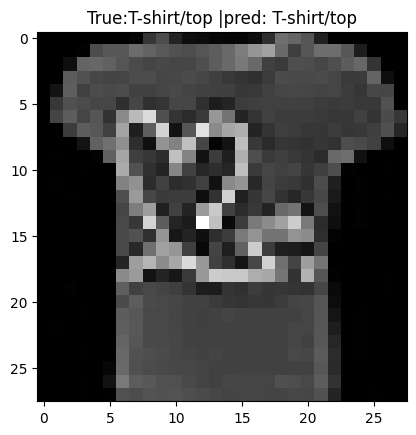

In [67]:
import random
import matplotlib.pyplot as plt

random_number = random.randint(1,len(list(test_dataloader)))
random_batch,random_label = list(test_dataloader)[random_number]

y_pred_logits = model_1(random_batch[0].unsqueeze(dim=0).to(device))
y_pred_label = torch.softmax(y_pred_logits,dim=1).argmax(dim=1).item()

pred_class = classes_name[y_pred_label]
original_class = classes_name[random_label[0].item()]

plt.imshow(random_batch[0].squeeze().cpu(),cmap="gray")
plt.title(f"True:{original_class} |pred: {pred_class}")
plt.show()

## 11. Plot a confusion matrix comparing your model's predictions to the truth labels.

In [68]:
! pip install -q torchmetrics

In [69]:
def evaluation(data:torch.utils.data.DataLoader,model:torch.nn.Module,device:torch.device)->torch.Tensor:
    """
    Evalute model on the data give and return the predictions labels
    params:
    data (torch.utils.data.DataLoader)
    model (torch.nn.Module)
    device (torch.device)
    """

    predictions = []

    model.eval()
    model.to(device)
    with torch.inference_mode():
        for X,y in data:
            X,y = X.to(device),y.to(device)
            pred_logits = model(X)
            pred_labels = torch.softmax(pred_logits.squeeze(),dim=0).argmax(dim=1)

            predictions.append(pred_labels.cpu())


    return torch.cat(predictions)

(<Figure size 1000x1600 with 1 Axes>,
 <Axes: xlabel='predicted label', ylabel='true label'>)

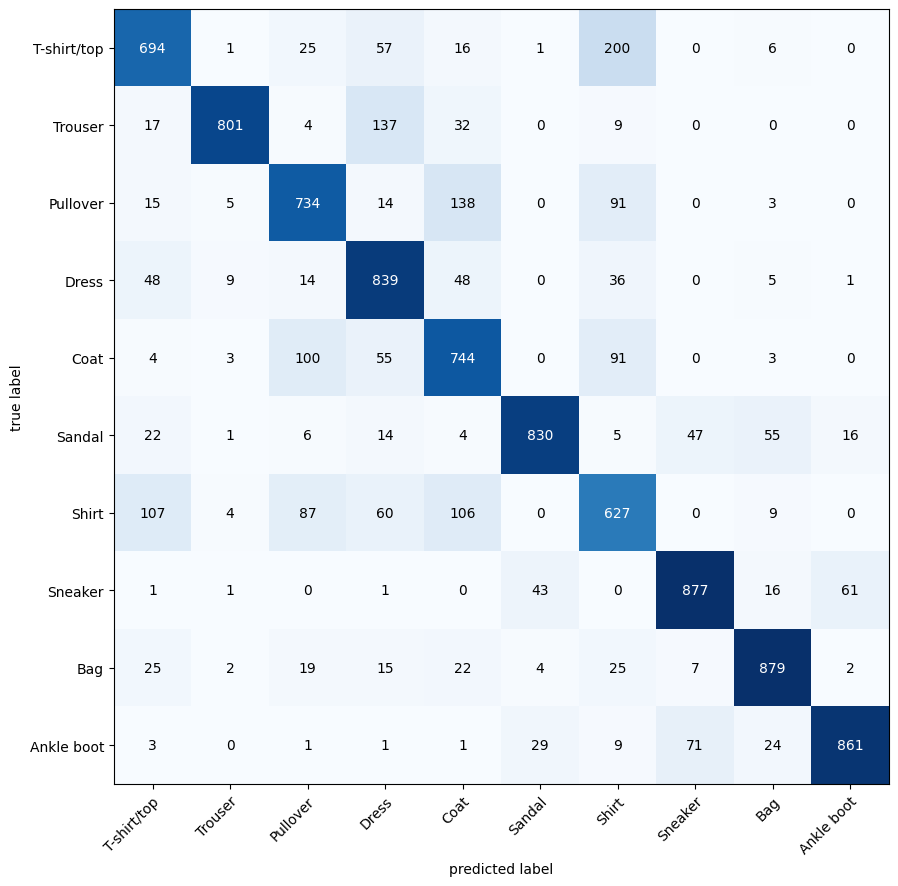

In [70]:
# CONFUSION MATRIX
from torchmetrics import ConfusionMatrix
from mlxtend.plotting import plot_confusion_matrix

preds = evaluation(test_dataloader,model_1,device)

matrix = ConfusionMatrix(task="multiclass",num_classes=len(classes_name))
confmat = matrix(preds,test_dataset.targets)

plot_confusion_matrix(conf_mat=confmat.numpy(),
                      figsize=(10,16),
                      class_names=classes_name)

## 12. Create a random tensor of shape `[1, 3, 64, 64]` and pass it through a `nn.Conv2d()` layer with various hyperparameter settings (these can be any settings you choose), what do you notice if the `kernel_size` parameter goes up and down?

In [75]:
conv2d = nn.Conv2d(in_channels = 3,
                   out_channels = 10,
                   kernel_size = 3,
                   stride = 4,
                   padding = 1)
random_data = torch.rand(size=[1,3,64,64])

random_prediction = conv2d(random_data)
random_prediction.shape

torch.Size([1, 10, 16, 16])

## 13. Use a model similar to the trained `model_2` from notebook 03 to make predictions on the test [`torchvision.datasets.FashionMNIST`](https://pytorch.org/vision/main/generated/torchvision.datasets.FashionMNIST.html) dataset.
* Then plot some predictions where the model was wrong alongside what the label of the image should've been.
* After visualing these predictions do you think it's more of a modelling error or a data error?
* As in, could the model do better or are the labels of the data too close to each other (e.g. a "Shirt" label is too close to "T-shirt/top")?

I have done the visualization
I think there is some labelling error also we have to tune the model.